In [12]:
#Importing Essential Libraries

import tensorflow
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Reading the dataset (Movie.csv) which is going to be used for this project

data_movie = pd.read_csv(r"movie.csv.xls", sep=',', encoding='latin-1')
data_movie.head()

,movie_id,movie,region,language,release_year,duration_in_min,genres,numvotes,primaryname,role,birthyear,deathyear,primaryprofession,rating
0,10000,Amor gitano,ES,NaN,1910,NaN,NaN,8,Segundo de Chomón,director,1871.0,1929.0,"director,cinematographer,writer",5.6
1,10001,As in a Looking Glass,US,NaN,1911,NaN,Drama,28,Wilfred Lucas,actor,1871.0,1940.0,"actor,director,writer",5.1
2,10002,The Infant at Snakeville,US,NaN,1911,NaN,NaN,5,Gilbert M. Broncho Billy Anderson,actor,1880.0,1971.0,"director,actor,producer",5.2
3,10003,Who Will Marry Mary?,US,NaN,1913,NaN,"Action,Adventure",14,Mary Fuller,actress,1888.0,1973.0,"actress,writer",5.6
4,10004,The Active Life of Dolly of the Dailies,US,NaN,1914,NaN,Drama,43,Mary Fuller,actress,1888.0,1973.0,"actress,writer",6.2


In [14]:
# Displaying the names of the columns preset in the dataset

data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18166 entries, 0 to 18165
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           18166 non-null  int64  
 1   movie              18166 non-null  object 
 2   region             18166 non-null  object 
 3   language           3571 non-null   object 
 4   release_year       18166 non-null  int64  
 5   duration_in_min    17196 non-null  float64
 6   genres             17564 non-null  object 
 7   numvotes           18166 non-null  int64  
 8   primaryname        18166 non-null  object 
 9   role               18166 non-null  object 
 10  birthyear          16500 non-null  float64
 11  deathyear          10958 non-null  float64
 12  primaryprofession  18072 non-null  object 
 13  rating             18066 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.9+ MB


In [15]:
# Getting the basic idea of the values in the dataset

data_movie.describe()

,movie_id,release_year,duration_in_min,numvotes,birthyear,deathyear,rating
count,18166.000000,18166.000000,17196.000000,1.816600e+04,16500.000000,10958.000000,18066.000000
mean,19082.500000,1963.769404,89.285066,2.603955e+03,1924.724727,1984.794944,5.974626
std,5244.216831,23.172771,26.648045,2.800400e+04,24.676553,22.148750,1.103099
min,10000.000000,1897.000000,14.000000,5.000000e+00,1830.000000,1914.000000,1.000000
25%,14541.250000,1944.000000,76.000000,2.200000e+01,1906.000000,1970.000000,5.300000
50%,19082.500000,1967.000000,89.000000,7.700000e+01,1925.000000,1987.000000,6.100000
75%,23623.750000,1985.000000,98.000000,3.400000e+02,1945.000000,2003.000000,6.700000
max,28165.000000,2019.000000,1428.000000,1.546898e+06,1990.000000,2020.000000,9.400000


In [16]:
#Finding the number of null values in each feature of the dataset

data_movie.isna().sum()

movie_id                 0
movie                    0
region                   0
language             14595
release_year             0
duration_in_min        970
genres                 602
numvotes                 0
primaryname              0
role                     0
birthyear             1666
deathyear             7208
primaryprofession       94
rating                 100
dtype: int64

In [17]:
col=["movie_id","movie","region","language","release_year","duration_in_min","genres","numvotes","primaryname","role","birthyear","deathyear","primaryprofession","rating"]

In [18]:
missing=list(data_movie.isna().sum())

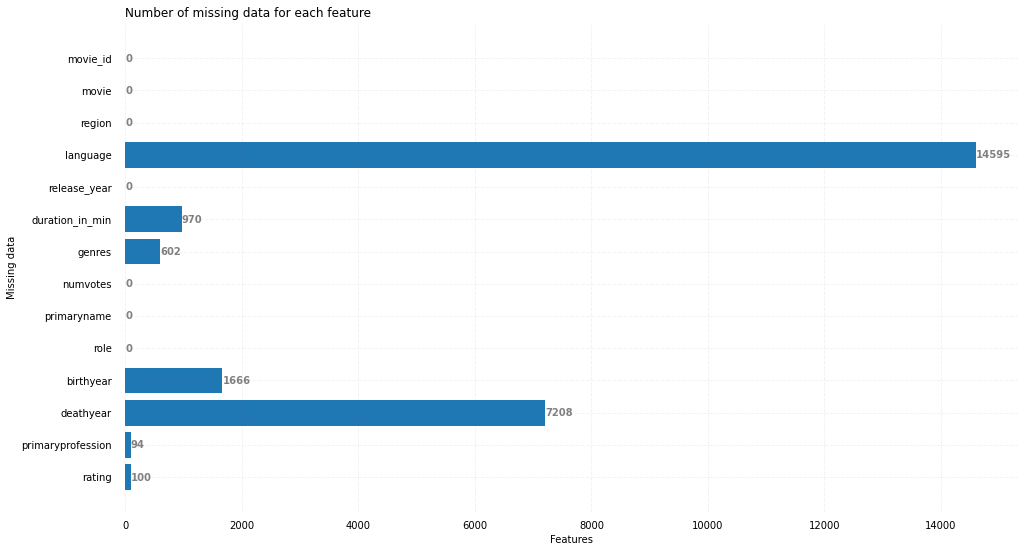

<Figure size 432x288 with 0 Axes>

In [19]:
# Visual Representation of the missing values in the dataset

# fig,ax = plt.figure(figsize = (10, 5))
# plt.bar(col, missing, color ='maroon',
#         width = 0.4)
 
# plt.xlabel("Features")
# plt.ylabel("Number of Missing data")
# plt.title("Missing data in each feature")
# plt.show()
# Figure Size
name=col
price=missing
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of missing data for each feature',
             loc ='left', )
 
plt.xlabel("Features")
plt.ylabel("Missing data")
 
# Show Plot
plt.show()
plt.savefig(r"missing_graph.png")

In [20]:
# Dropping the feature 'Language'

data_movie.drop('language',axis =1,inplace = True)

In [21]:
# Displaying the types of genres present in the dataset

data_movie["genres"].unique()

array([nan, 'Drama', 'Action,Adventure', 'Comedy,Drama,Western',
       'Drama,Romance', 'Fantasy', 'Adventure,Drama,Romance', 'War',
       'Western', 'Comedy', 'Comedy,Drama', 'Drama,War', 'Comedy,Romance',
       'Action,Adventure,Comedy', 'Adventure', 'Action,Adventure,Crime',
       'Adventure,Crime,Romance', 'Comedy,Drama,Mystery',
       'Action,Drama,Western', 'Comedy,Western',
       'Action,Adventure,Romance', 'Action,Drama,Romance', 'Mystery',
       'Comedy,Crime,Romance', 'Action,Adventure,Drama',
       'Adventure,Drama', 'Crime', 'Thriller', 'Comedy,Crime,Drama',
       'Romance,Western', 'Crime,Drama,Romance', 'Crime,Drama',
       'Comedy,Crime', 'Drama,Mystery', 'Action,Comedy,Drama',
       'Action,Crime,Drama', 'Action,Drama', 'Adventure,Comedy,Drama',
       'Drama,Musical,Romance', 'Action,Romance,Western',
       'Comedy,Family,Fantasy', 'Adventure,Crime,Drama',
       'Comedy,Musical,Romance', 'Comedy,Drama,Music',
       'Action,Adventure,Western', 'Comedy,Dram

In [22]:
# Displaying the number of unique genres present in the dataset

len(data_movie["genres"].unique())

605

In [23]:
genres_list=list(data_movie["genres"].unique())

In [24]:
genres_frequency={}
for diff_gensres in genres_list:
    if(type(diff_gensres)!=float):
        diff_gensres=diff_gensres.split(",")
        for i in diff_gensres:
            if(i in genres_frequency.keys()):
                genres_frequency[i]+=1
            else:
                genres_frequency[i]=1 

Text(0.5, 1.0, 'Frequency of different genres in genres feature')

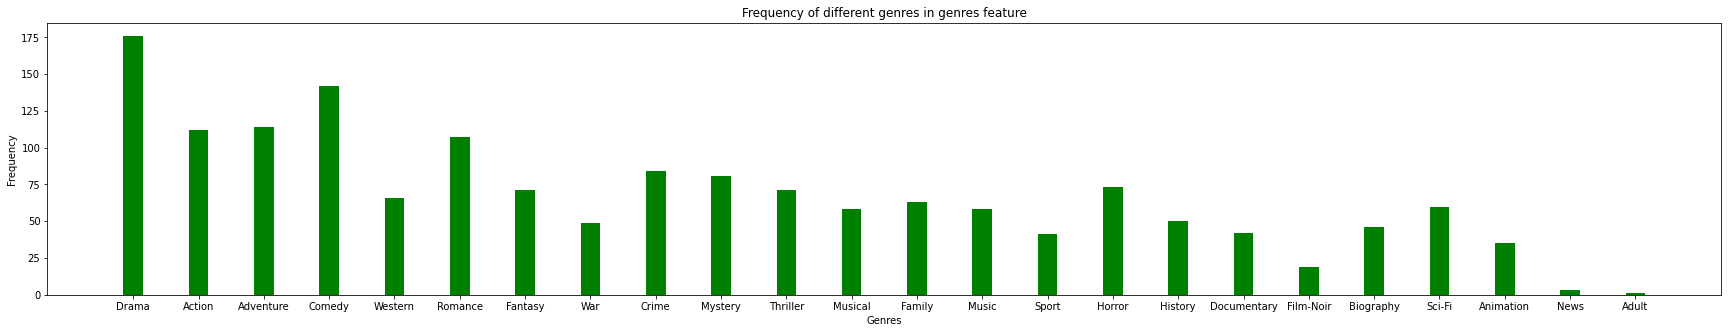

In [25]:
# Graphical representation of the frequencies of unique genres in the dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.bar(genres_frequency.keys(), genres_frequency.values(), width=0.3,color='g')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.title("Frequency of different genres in genres feature")

In [26]:
# Finding the frequency of each genre

dict(sorted(genres_frequency.items(), key=lambda item: item[1]))

{'Adult': 1,
 'News': 3,
 'Film-Noir': 19,
 'Animation': 35,
 'Sport': 41,
 'Documentary': 42,
 'Biography': 46,
 'War': 49,
 'History': 50,
 'Musical': 58,
 'Music': 58,
 'Sci-Fi': 60,
 'Family': 63,
 'Western': 66,
 'Fantasy': 71,
 'Thriller': 71,
 'Horror': 73,
 'Mystery': 81,
 'Crime': 84,
 'Romance': 107,
 'Action': 112,
 'Adventure': 114,
 'Comedy': 142,
 'Drama': 176}

In [27]:
data_movie['genres'].fillna(value = "Drama,Comedy,Adventure",inplace = True)

In [28]:
data_movie['Drama'] = 0
data_movie['Adventure'] = 0
data_movie['Comedy'] = 0
data_movie['Thriller'] = 0
data_movie['Documentary'] = 0
data_movie['Other'] = 0

In [29]:
# Generalizing the genres

for i in range(0,18166):
    df1 = data_movie['genres'][i].split(',')
    if len(df1) == 2:
        for j in range(0,2):
            if (df1[j] == 'Drama' or df1[j] == 'Romance' or df1[j] == 'Musical' or df1[j] == 'Western' or df1[j] == 'Family' or df1[j] == 'Fantasy' or df1[j] == 'Music'):
                data_movie['Drama'][i] = 1
            elif (df1[j] == 'Adventure' or df1[j] == 'War'):
                data_movie['Adventure'][i] = 1
            elif (df1[j] == 'Crime' or df1[j] == 'Horror' or df1[j] == 'Action' or df1[j] == 'Thriller' or df1[j] == 'Mystery' or df1[j] == 'Sci-Fi' or df1[j] == 'History'):
                data_movie['Thriller'][i] = 1
            elif df1[j] == 'Comedy':
                data_movie['Comedy'][i] = 1
            elif (df1[j] == 'Biography' or df1[j] == 'Documentary' or df1[j] == 'Sport'):
                data_movie['Documentary'][i] = 1
            else: data_movie['Other'][i] = 1
    elif len(df1) == 3:
        for j in range(0,3):
            if (df1[j] == 'Drama' or df1[j] == 'Romance' or df1[j] == 'Musical' or df1[j] == 'Western' or df1[j] == 'Family' or df1[j] == 'Fantasy' or df1[j] == 'Music'):
                data_movie['Drama'][i] = 1
            elif (df1[j] == 'Adventure' or df1[j] == 'War'):
                data_movie['Adventure'][i] = 1
            elif (df1[j] == 'Crime' or df1[j] == 'Horror' or df1[j] == 'Action' or df1[j] == 'Thriller' or df1[j] == 'Mystery' or df1[j] == 'Sci-Fi' or df1[j] == 'History'):
                data_movie['Thriller'][i] = 1
            elif df1[j] == 'Comedy':
                data_movie['Comedy'][i] = 1
            elif (df1[j] == 'Biography' or df1[j] == 'Documentary' or df1[j] == 'Sport'):
                data_movie['Documentary'][i] = 1
            else: data_movie['Other'][i] = 1
    elif len(df1) == 1:
        j = 0
        if (df1[j] == 'Drama' or df1[j] == 'Romance' or df1[j] == 'Musical' or df1[j] == 'Western' or df1[j] == 'Family' or df1[j] == 'Fantasy' or df1[j] == 'Music'):
            data_movie['Drama'][i] = 1
        elif (df1[j] == 'Adventure' or df1[j] == 'War'):
            data_movie['Adventure'][i] = 1
        elif (df1[j] == 'Crime' or df1[j] == 'Horror' or df1[j] == 'Action' or df1[j] == 'Thriller' or df1[j] == 'Mystery' or df1[j] == 'Sci-Fi' or df1[j] == 'History'):
            data_movie['Thriller'][i] = 1
        elif df1[j] == 'Comedy':
            data_movie['Comedy'][i] = 1
        elif (df1[j] == 'Biography' or df1[j] == 'Documentary' or df1[j] == 'Sport'):
            data_movie['Documentary'][i] = 1
        else: data_movie['Other'][i] = 1
        
            
        
        

<ipython-input-29-a733d379cbe3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['Drama'][i] = 1
<ipython-input-29-a733d379cbe3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['Comedy'][i] = 1
<ipython-input-29-a733d379cbe3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['Adventure'][i] = 1
<ipython-input-29-a733d379cbe3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [30]:
# Dropping the feature genre after Generalization

data_movie.drop('genres',axis =1,inplace = True)

In [31]:
# Dropping the feature primary_name because it doesn't any relevancy to the further processing

data_movie.drop('primaryname',axis =1,inplace = True)

In [32]:
# One-hot encoding the feature 'Role'

role = pd.get_dummies(data_movie['role'],drop_first = True)
data_movie = pd.concat([data_movie,role],axis = 1)

In [33]:
data_movie.head()

,movie_id,movie,region,release_year,duration_in_min,numvotes,role,birthyear,deathyear,primaryprofession,...,Documentary,Other,actress,archive_footage,cinematographer,composer,director,producer,self,writer
0,10000,Amor gitano,ES,1910,NaN,8,director,1871.0,1929.0,"director,cinematographer,writer",...,0,0,0,0,0,0,1,0,0,0
1,10001,As in a Looking Glass,US,1911,NaN,28,actor,1871.0,1940.0,"actor,director,writer",...,0,0,0,0,0,0,0,0,0,0
2,10002,The Infant at Snakeville,US,1911,NaN,5,actor,1880.0,1971.0,"director,actor,producer",...,0,0,0,0,0,0,0,0,0,0
3,10003,Who Will Marry Mary?,US,1913,NaN,14,actress,1888.0,1973.0,"actress,writer",...,0,0,1,0,0,0,0,0,0,0
4,10004,The Active Life of Dolly of the Dailies,US,1914,NaN,43,actress,1888.0,1973.0,"actress,writer",...,0,0,1,0,0,0,0,0,0,0


In [34]:
#data_movie.drop('role',axis =1,inplace = True)

In [35]:
# Dropping the feature movie_id because it doesn't provide any relevancy in the further processing

data_movie.drop('movie_id',axis =1,inplace = True)

In [36]:
# Categorizing the movies present in the dataset based on the number of votesS

def input_votes (cols):
    numvotes = cols[0]
    movie = cols[1]
    if numvotes >= 500000:
        movie = 'A'
        return movie
    elif numvotes < 500000 and numvotes >= 200000:
        movie = 'B'
        return movie
    elif numvotes < 200000 and numvotes >= 50000:
        movie = 'C'
        return movie
    elif numvotes < 50000 and numvotes >= 20000:
        movie = 'D'
        return movie
    elif numvotes < 20000 and numvotes >= 5000:
        movie = 'E'
        return movie
    elif numvotes < 5000 and numvotes >= 2000:
        movie = 'F'
        return movie
    elif numvotes < 2000 and numvotes >= 1000:
        movie = 'G'
        return movie
    elif numvotes < 1000 and numvotes >= 500:
        movie = 'H'
        return movie
    else:
        movie = 'I'
        return movie
        


In [37]:
data_movie['movie'] = data_movie[['numvotes','movie']].apply(input_votes,axis = 1)

In [38]:
data_movie.head()

,movie,region,release_year,duration_in_min,numvotes,role,birthyear,deathyear,primaryprofession,rating,...,Documentary,Other,actress,archive_footage,cinematographer,composer,director,producer,self,writer
0,I,ES,1910,NaN,8,director,1871.0,1929.0,"director,cinematographer,writer",5.6,...,0,0,0,0,0,0,1,0,0,0
1,I,US,1911,NaN,28,actor,1871.0,1940.0,"actor,director,writer",5.1,...,0,0,0,0,0,0,0,0,0,0
2,I,US,1911,NaN,5,actor,1880.0,1971.0,"director,actor,producer",5.2,...,0,0,0,0,0,0,0,0,0,0
3,I,US,1913,NaN,14,actress,1888.0,1973.0,"actress,writer",5.6,...,0,0,1,0,0,0,0,0,0,0
4,I,US,1914,NaN,43,actress,1888.0,1973.0,"actress,writer",6.2,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# One- Hot Encoding the feature movie in the dataset

movie = pd.get_dummies(data_movie['movie'],drop_first = True)
data_movie = pd.concat([data_movie,movie],axis = 1)

In [40]:
# Dropping the feature movie after one-hot encoding

data_movie.drop('movie',axis =1,inplace = True)

In [41]:
data_movie.head()

,region,release_year,duration_in_min,numvotes,role,birthyear,deathyear,primaryprofession,rating,Drama,...,self,writer,B,C,D,E,F,G,H,I
0,ES,1910,NaN,8,director,1871.0,1929.0,"director,cinematographer,writer",5.6,1,...,0,0,0,0,0,0,0,0,0,1
1,US,1911,NaN,28,actor,1871.0,1940.0,"actor,director,writer",5.1,1,...,0,0,0,0,0,0,0,0,0,1
2,US,1911,NaN,5,actor,1880.0,1971.0,"director,actor,producer",5.2,1,...,0,0,0,0,0,0,0,0,0,1
3,US,1913,NaN,14,actress,1888.0,1973.0,"actress,writer",5.6,0,...,0,0,0,0,0,0,0,0,0,1
4,US,1914,NaN,43,actress,1888.0,1973.0,"actress,writer",6.2,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
def input_role (cols):
    role = cols[0]
    primaryprofession = cols[1]
    if pd.isnull(primaryprofession):
        if role == 'director':
            return 'director'
        elif role == 'actor':
            return 'actor'
        elif role == 'actress':
            return 'actress'
        elif role == 'composer':
            return 'composer'
        elif role == 'cinematographer':
            return 'cinematographer'
        elif role == 'writer':
            return'writer'
        elif role == 'producer':
            return 'producer'
        elif role == 'self' or role == 'archive_footage':
            return 'miscellaneous'
        
    else: return primaryprofession


In [43]:
data_movie['primaryprofession'] = data_movie[['role','primaryprofession']].apply(input_role,axis = 1)

In [44]:
data_movie.drop('role',axis =1,inplace = True)

In [45]:
data_movie['actor'] = 0
data_movie['director'] = 0
data_movie['actress'] = 0
data_movie['cinematographer'] = 0
data_movie['writer'] = 0
data_movie['producer'] = 0
data_movie['sound'] = 0
data_movie['miscellaneous'] = 0
data_movie['costume'] = 0
data_movie['editor'] = 0
data_movie['art'] = 0
data_movie['casting'] = 0
data_movie['other'] = 0


In [46]:
# Generalizing the primary profession feature in the dataset

for i in range(0,18166):
    df1 = data_movie['primaryprofession'][i].split(',')
    if len(df1) == 2:
        for j in range(0,2):
            if (df1[j] == 'director' or df1[j] == 'assistant_director'):
                data_movie['director'][i] = 1
            elif (df1[j] == 'actor'):
                data_movie['actor'][i] = 1
            elif (df1[j] == 'actress'):
                data_movie['actress'][i] = 1
            elif (df1[j] == 'cinematographer' or df1[j] == 'camera_department'):
                data_movie['cinematographer'][i] = 1
            elif (df1[j] == 'writer' or df1[j] == 'script_department'):
                data_movie['writer'][i] = 1
            elif (df1[j] == 'producer' or df1[j] == 'production_manager' or df1[j] == 'production_designer' or df1[j] == 'manager' or df1[j] == 'executive'):
                data_movie['producer'][i] = 1
            elif (df1[j] == 'soundtrack' or df1[j] == 'sound_department' or df1[j] == 'music_department' or df1[j] == 'composer'):
                data_movie['sound'][i] = 1
            elif df1[j] == 'miscellaneous':
                data_movie['miscellaneous'][i] = 1
            elif (df1[j] == 'costume_designer' or df1[j] == 'costume_department'):
                data_movie['costume'][i] = 1
            elif (df1[j] == 'editor' or df1[j] == 'editorial_department' or df1[j] == 'visual_effects' or df1[j] == 'animation_department' or df1[j] == 'special_effects'):
                data_movie['editor'][i] = 1
            elif (df1[j] == 'art_director' or df1[j] == 'art_department'):
                data_movie['art'][i] = 1
            elif (df1[j] == 'casting_director' or df1[j] == 'casting_department'):
                data_movie['casting'][i] = 1
                
            else: data_movie['other'][i] = 1
    elif len(df1) == 3:
        for j in range(0,3):
            if (df1[j] == 'director' or df1[j] == 'assistant_director'):
                data_movie['director'][i] = 1
            elif (df1[j] == 'actor'):
                data_movie['actor'][i] = 1
            elif (df1[j] == 'actress'):
                data_movie['actress'][i] = 1
            elif (df1[j] == 'cinematographer' or df1[j] == 'camera_department'):
                data_movie['cinematographer'][i] = 1
            elif (df1[j] == 'writer' or df1[j] == 'script_department'):
                data_movie['writer'][i] = 1
            elif (df1[j] == 'producer' or df1[j] == 'production_manager' or df1[j] == 'production_designer' or df1[j] == 'manager' or df1[j] == 'executive'):
                data_movie['producer'][i] = 1
            elif (df1[j] == 'soundtrack' or df1[j] == 'sound_department' or df1[j] == 'music_department' or df1[j] == 'composer'):
                data_movie['sound'][i] = 1
            elif df1[j] == 'miscellaneous':
                data_movie['miscellaneous'][i] = 1
            elif (df1[j] == 'costume_designer' or df1[j] == 'costume_department'):
                data_movie['costume'][i] = 1
            elif (df1[j] == 'editor' or df1[j] == 'editorial_department' or df1[j] == 'visual_effects' or df1[j] == 'animation_department' or df1[j] == 'special_effects'):
                data_movie['editor'][i] = 1
            elif (df1[j] == 'art_director' or df1[j] == 'art_department'):
                data_movie['art'][i] = 1
            elif (df1[j] == 'casting_director' or df1[j] == 'casting_department'):
                data_movie['casting'][i] = 1
                
            else: data_movie['other'][i] = 1
    elif len(df1) == 1:
        j = 0
        if (df1[j] == 'director' or df1[j] == 'assistant_director'):
            data_movie['director'][i] = 1
        elif (df1[j] == 'actor'):
            data_movie['actor'][i] = 1
        elif (df1[j] == 'actress'):
            data_movie['actress'][i] = 1
        elif (df1[j] == 'cinematographer' or df1[j] == 'camera_department'):
            data_movie['cinematographer'][i] = 1
        elif (df1[j] == 'writer' or df1[j] == 'script_department'):
            data_movie['writer'][i] = 1
        elif (df1[j] == 'producer' or df1[j] == 'production_manager' or df1[j] == 'production_designer' or df1[j] == 'manager' or df1[j] == 'executive'):
            data_movie['producer'][i] = 1
        elif (df1[j] == 'soundtrack' or df1[j] == 'sound_department' or df1[j] == 'music_department' or df1[j] == 'composer'):
            data_movie['sound'][i] = 1
        elif df1[j] == 'miscellaneous':
            data_movie['miscellaneous'][i] = 1
        elif (df1[j] == 'costume_designer' or df1[j] == 'costume_department'):
            data_movie['costume'][i] = 1
        elif (df1[j] == 'editor' or df1[j] == 'editorial_department' or df1[j] == 'visual_effects' or df1[j] == 'animation_department' or df1[j] == 'special_effects'):
            data_movie['editor'][i] = 1
        elif (df1[j] == 'art_director' or df1[j] == 'art_department'):
            data_movie['art'][i] = 1
        elif (df1[j] == 'casting_director' or df1[j] == 'casting_department'):
            data_movie['casting'][i] = 1
                
        else: data_movie['other'][i] = 1
        
            
        
        

<ipython-input-46-c0a496fd8c83>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['director'][i] = 1
<ipython-input-46-c0a496fd8c83>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['cinematographer'][i] = 1
<ipython-input-46-c0a496fd8c83>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['writer'][i] = 1
<ipython-input-46-c0a496fd8c83>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [47]:
# Dropping the feature primaryprofession after generalization

data_movie.drop('primaryprofession',axis =1,inplace = True)

In [48]:
# One- hot encoding the feature 'region'

region = pd.get_dummies(data_movie['region'],drop_first = True)
data_movie = pd.concat([data_movie,region],axis = 1)

In [49]:
# Dropping the feature region after one-hot encoding

data_movie.drop('region',axis = 1,inplace = True)

In [50]:
# Displaying the current available columns in the dataset

data_movie.count()

release_year       18166
duration_in_min    17196
numvotes           18166
birthyear          16500
deathyear          10958
rating             18066
Drama              18166
Adventure          18166
Comedy             18166
Thriller           18166
Documentary        18166
Other              18166
actress            18166
archive_footage    18166
cinematographer    18166
composer           18166
director           18166
producer           18166
self               18166
writer             18166
B                  18166
C                  18166
D                  18166
E                  18166
F                  18166
G                  18166
H                  18166
I                  18166
actor              18166
sound              18166
miscellaneous      18166
costume            18166
editor             18166
art                18166
casting            18166
other              18166
BD                 18166
BE                 18166
CA                 18166
CH                 18166


In [51]:
# Replacing the missing values in the feature birthyear with the mean value of the column

data_movie['birthyear'].fillna(value = data_movie['birthyear'].mean(),inplace = True)

In [52]:
data_movie['birthyear']

0        1871.000000
1        1871.000000
2        1880.000000
3        1888.000000
4        1888.000000
            ...     
18161    1930.000000
18162    1888.000000
18163    1937.000000
18164    1960.000000
18165    1924.724727
Name: birthyear, Length: 18166, dtype: float64

In [53]:
# Replacing the missing values in the feature deathyear with the mean value of the column

data_movie['deathyear'].fillna(value = int(data_movie['deathyear'].mean()),inplace = True)

In [54]:
data_movie['deathyear']

0        1929.0
1        1940.0
2        1971.0
3        1973.0
4        1973.0
          ...  
18161    2001.0
18162    1976.0
18163    1984.0
18164    1984.0
18165    1984.0
Name: deathyear, Length: 18166, dtype: float64

In [55]:
# Replacing the missing values in the feature duration_in_min with the mean value of the column

data_movie['duration_in_min'].fillna(value = int(data_movie['duration_in_min'].mean()),inplace = True)

In [56]:
data_movie.tail(10)

,release_year,duration_in_min,numvotes,birthyear,deathyear,rating,Drama,Adventure,Comedy,Thriller,...,JP,LU,NZ,PH,TH,US,XAS,XEU,XWW,ZA
18156,1997,102.0,149,1965.000000,1984.0,6.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
18157,2002,91.0,70,1924.724727,1984.0,6.5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18158,1997,95.0,27,1958.000000,1984.0,5.7,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
18159,1997,92.0,91,1924.724727,1984.0,5.5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18160,1999,89.0,104,1973.000000,1984.0,4.6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18161,1985,91.0,1245,1930.000000,2001.0,3.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18162,1941,90.0,21,1888.000000,1976.0,8.7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18163,1959,85.0,78,1937.000000,1984.0,5.9,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
18164,1973,77.0,5,1960.000000,1984.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18165,1994,89.0,11,1924.724727,1984.0,7.5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [57]:
np.where(pd.to_numeric(data_movie['rating'], errors='coerce').isna())

(array([  114,   294,   474,   655,   835,  1017,  1198,  1378,  1559,
         1739,  1919,  2100,  2281,  2460,  2641,  2821,  3000,  3182,
         3362,  3544,  3725,  3907,  4087,  4269,  4450,  4630,  4811,
         4991,  5172,  5353,  5534,  5715,  5895,  6076,  6257,  6437,
         6617,  6797,  6976,  7155,  7335,  7515,  7695,  7877,  8057,
         8237,  8417,  8596,  8778,  8961,  9144,  9326,  9506,  9686,
         9869, 10049, 10232, 10412, 10592, 10772, 10952, 11133, 11313,
        11494, 11676, 11857, 12038, 12218, 12400, 12579, 12760, 12940,
        13121, 13301, 13481, 13665, 13845, 14025, 14204, 14384, 14565,
        14745, 14925, 15106, 15288, 15467, 15647, 15828, 16008, 16191,
        16372, 16552, 16732, 16912, 17092, 17272, 17451, 17635, 17817,
        17998]),)

In [58]:
data_movie_test = data_movie.iloc[[  114,   294,   474,   655,   835,  1017,  1198,  1378,  1559,
         1739,  1919,  2100,  2281,  2460,  2641,  2821,  3000,  3182,
         3362,  3544,  3725,  3907,  4087,  4269,  4450,  4630,  4811,
         4991,  5172,  5353,  5534,  5715,  5895,  6076,  6257,  6437,
         6617,  6797,  6976,  7155,  7335,  7515,  7695,  7877,  8057,
         8237,  8417,  8596,  8778,  8961,  9144,  9326,  9506,  9686,
         9869, 10049, 10232, 10412, 10592, 10772, 10952, 11133, 11313,
        11494, 11676, 11857, 12038, 12218, 12400, 12579, 12760, 12940,
        13121, 13301, 13481, 13665, 13845, 14025, 14204, 14384, 14565,
        14745, 14925, 15106, 15288, 15467, 15647, 15828, 16008, 16191,
        16372, 16552, 16732, 16912, 17092, 17272, 17451, 17635, 17817,
        17998]]

In [59]:
data_movie_test.head(10)

,release_year,duration_in_min,numvotes,birthyear,deathyear,rating,Drama,Adventure,Comedy,Thriller,...,JP,LU,NZ,PH,TH,US,XAS,XEU,XWW,ZA
114,1934,86.0,2737,1899.000000,1974.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,1950,98.0,403,1922.000000,2013.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,1972,110.0,9396,1936.000000,1984.0,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
655,1989,90.0,6,1924.724727,1984.0,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
835,1935,58.0,27,1896.000000,1967.0,NaN,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1017,1966,88.0,807,1943.000000,1984.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,1990,98.0,596,1964.000000,1984.0,NaN,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1378,1940,64.0,34,1904.000000,1972.0,NaN,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1559,1977,90.0,61,1925.000000,2006.0,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1739,1996,97.0,24480,1970.000000,1984.0,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
data_movie.dropna(axis=0, subset=["rating"], inplace = True) 

In [61]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18066 entries, 0 to 18165
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   release_year     18066 non-null  int64  
 1   duration_in_min  18066 non-null  float64
 2   numvotes         18066 non-null  int64  
 3   birthyear        18066 non-null  float64
 4   deathyear        18066 non-null  float64
 5   rating           18066 non-null  float64
 6   Drama            18066 non-null  int64  
 7   Adventure        18066 non-null  int64  
 8   Comedy           18066 non-null  int64  
 9   Thriller         18066 non-null  int64  
 10  Documentary      18066 non-null  int64  
 11  Other            18066 non-null  int64  
 12  actress          18066 non-null  int64  
 13  archive_footage  18066 non-null  uint8  
 14  cinematographer  18066 non-null  int64  
 15  composer         18066 non-null  uint8  
 16  director         18066 non-null  int64  
 17  producer    

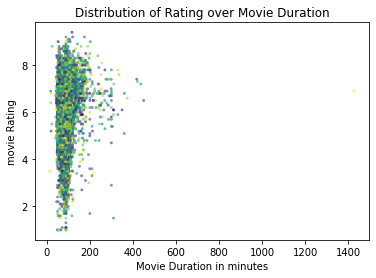

In [62]:
# Plotting a scatter plot with the ratings of the movies against the duration of each movie

randnums= np.random.randint(1,101,len(data_movie["rating"]))
N=66
colors = np.random.rand(N)
x=np.array(data_movie["rating"])
y=np.array(data_movie["duration_in_min"])
plt.scatter(y, x, s=4, c=randnums, alpha=0.5)

plt.ylabel("movie Rating")
plt.xlabel("Movie Duration in minutes")
plt.title("Distribution of Rating over Movie Duration")
plt.show()

In [63]:
data_movie[data_movie["duration_in_min"]>1200]

,release_year,duration_in_min,numvotes,birthyear,deathyear,rating,Drama,Adventure,Comedy,Thriller,...,JP,LU,NZ,PH,TH,US,XAS,XEU,XWW,ZA
16620,1914,1428.0,81,1893.0,1950.0,6.9,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [64]:
# Dropping the outlier present in the scatter plot

data_movie = data_movie.drop(labels=16620, axis=0)

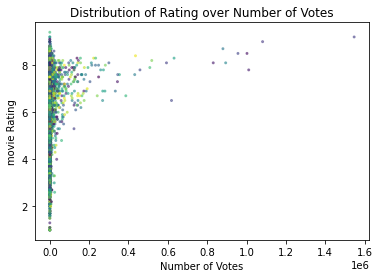

In [65]:
# Plotting a scatter plot with the ratings of the movies against the number of votes obtained by each movie

randnums= np.random.randint(1,101,len(data_movie["rating"]))
N=66
colors = np.random.rand(N)
x=np.array(data_movie["rating"])
y=np.array(data_movie["numvotes"])
plt.scatter(y, x, s=4, c=randnums, alpha=0.5)
plt.ylabel("movie Rating")
plt.xlabel("Number of Votes")
plt.title("Distribution of Rating over Number of Votes")
plt.show()

In [66]:
data_movie[data_movie["numvotes"]>1546890]

,release_year,duration_in_min,numvotes,birthyear,deathyear,rating,Drama,Adventure,Comedy,Thriller,...,JP,LU,NZ,PH,TH,US,XAS,XEU,XWW,ZA
3920,1972,175.0,1546898,1924.0,2004.0,9.2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Dropping the outlier present in the scatter plot

data_movie = data_movie.drop(labels=3920, axis=0)

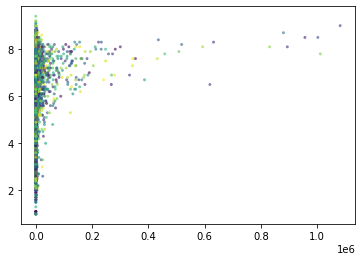

In [68]:
randnums= np.random.randint(1,101,len(data_movie["rating"]))
N=66
colors = np.random.rand(N)
x=np.array(data_movie["rating"])
y=np.array(data_movie["numvotes"])
plt.scatter(y, x, s=4, c=randnums, alpha=0.5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f36ae3d5310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f36adfe50d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f36ae3d50a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f36adfd1250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f36adfd1ac0>,
 'means': []}

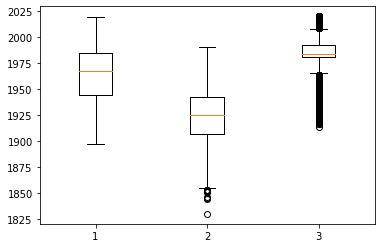

In [69]:
fig, ax = plt.subplots()
columns=[data_movie["release_year"],data_movie["birthyear"],data_movie["deathyear"]]
plt.boxplot(columns)

In [70]:
def get_summary_statistics(dataset):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Setosa summary statistics')
print('\n\nrelease_year summary statistics')
get_summary_statistics(data_movie["release_year"])
print('\n\nbirthyar summary statistics')
get_summary_statistics(data_movie["birthyear"])
print('\n\ndeathyear summary statistics')
get_summary_statistics(data_movie["deathyear"])



release_year summary statistics
Min: 1897
Mean: 1963.76
Max: 2019
25th percentile: 1944.0
Median: 1967.0
75th percentile: 1985.0
Interquartile range (IQR): 41.0
Setosa summary statistics


birthyar summary statistics
Min: 1830.0
Mean: 1924.72
Max: 1990.0
25th percentile: 1907.0
Median: 1924.72
75th percentile: 1942.0
Interquartile range (IQR): 35.0
Setosa summary statistics


deathyear summary statistics
Min: 1914.0
Mean: 1984.48
Max: 2020.0
25th percentile: 1981.0
Median: 1984.0
75th percentile: 1992.0
Interquartile range (IQR): 11.0
Setosa summary statistics


In [71]:
x=list(set(data_movie["deathyear"]))
lst=list(data_movie["deathyear"])
y=[]
for i in x:
    y.append(lst.count(i))

<BarContainer object of 106 artists>

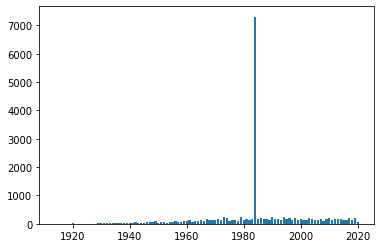

In [72]:
plt.bar(x,y)

In [73]:
data_movie.count()

release_year       18064
duration_in_min    18064
numvotes           18064
birthyear          18064
deathyear          18064
rating             18064
Drama              18064
Adventure          18064
Comedy             18064
Thriller           18064
Documentary        18064
Other              18064
actress            18064
archive_footage    18064
cinematographer    18064
composer           18064
director           18064
producer           18064
self               18064
writer             18064
B                  18064
C                  18064
D                  18064
E                  18064
F                  18064
G                  18064
H                  18064
I                  18064
actor              18064
sound              18064
miscellaneous      18064
costume            18064
editor             18064
art                18064
casting            18064
other              18064
BD                 18064
BE                 18064
CA                 18064
CH                 18064


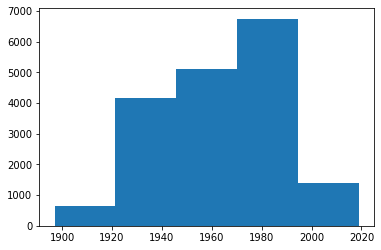

In [74]:
plt.hist(data_movie['release_year'], bins=5)
plt.show()

In [75]:
data_movie.columns

Index(['release_year', 'duration_in_min', 'numvotes', 'birthyear', 'deathyear',
       'rating', 'Drama', 'Adventure', 'Comedy', 'Thriller', 'Documentary',
       'Other', 'actress', 'archive_footage', 'cinematographer', 'composer',
       'director', 'producer', 'self', 'writer', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'actor', 'sound', 'miscellaneous', 'costume', 'editor', 'art',
       'casting', 'other', 'BD', 'BE', 'CA', 'CH', 'DZ', 'EG', 'ES', 'FR',
       'GB', 'GR', 'HK', 'IE', 'IL', 'IN', 'JP', 'LU', 'NZ', 'PH', 'TH', 'US',
       'XAS', 'XEU', 'XWW', 'ZA'],
      dtype='object')

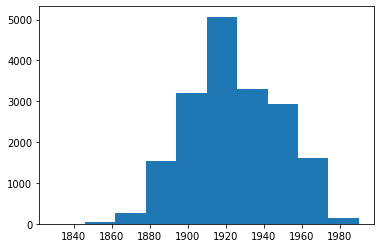

In [76]:
plt.hist(data_movie['birthyear'], bins=10)
plt.show()

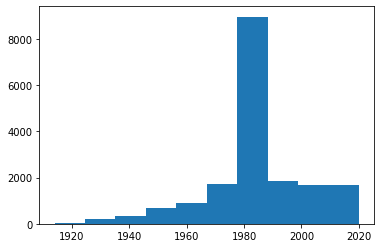

In [77]:
plt.hist(data_movie['deathyear'], bins=10)
plt.show()

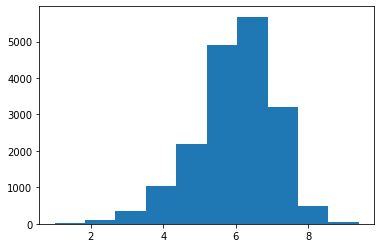

In [78]:
plt.hist(data_movie['rating'], bins=10)
plt.show()

In [79]:
from sklearn import preprocessing

x = data_movie.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_movie =pd.DataFrame(min_max_scaler.fit_transform(data_movie), columns=data_movie.columns, index=data_movie.index)

In [80]:
data_movie.head()

,release_year,duration_in_min,numvotes,birthyear,deathyear,rating,Drama,Adventure,Comedy,Thriller,...,JP,LU,NZ,PH,TH,US,XAS,XEU,XWW,ZA
0,0.106557,0.172018,0.000003,0.25625,0.141509,0.547619,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.114754,0.172018,0.000021,0.25625,0.245283,0.488095,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.114754,0.172018,0.000000,0.31250,0.537736,0.500000,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.131148,0.172018,0.000008,0.36250,0.556604,0.547619,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.139344,0.172018,0.000035,0.36250,0.556604,0.619048,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


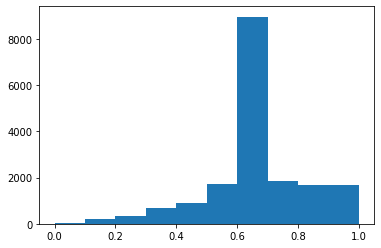

In [81]:
plt.hist(data_movie['deathyear'], bins=10)
plt.show()

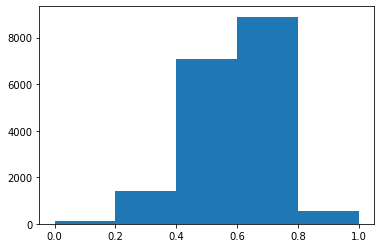

In [82]:
plt.hist(data_movie["rating"], bins=5)
plt.show()

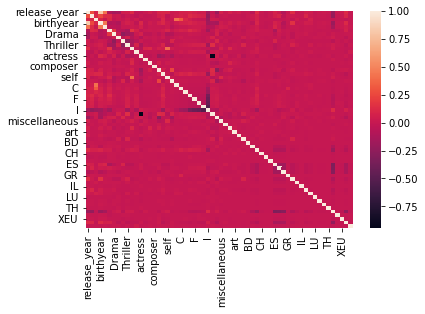

In [83]:
import seaborn as sns
corr = data_movie.corr()
sns.heatmap(corr)

In [84]:
df = data_movie.copy()
print("Data Frame")
print(df)
print()

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

Data Frame
       release_year  duration_in_min  numvotes  birthyear  deathyear  \
0          0.106557         0.172018  0.000003    0.25625   0.141509   
1          0.114754         0.172018  0.000021    0.25625   0.245283   
2          0.114754         0.172018  0.000000    0.31250   0.537736   
3          0.131148         0.172018  0.000008    0.36250   0.556604   
4          0.139344         0.172018  0.000035    0.36250   0.556604   
...             ...              ...       ...        ...        ...   
18161      0.721311         0.176606  0.001147    0.62500   0.820755   
18162      0.360656         0.174312  0.000015    0.36250   0.584906   
18163      0.508197         0.162844  0.000067    0.66875   0.660377   
18164      0.622951         0.144495  0.000000    0.81250   0.660377   
18165      0.795082         0.172018  0.000006    0.59203   0.660377   

         rating  Drama  Adventure  Comedy  Thriller  ...   JP   LU   NZ   PH  \
0      0.547619    1.0        1.0     1.0   

In [85]:
data_movie.drop('actor',axis =1,inplace = True)

In [86]:
concrete_data_columns = data_movie.columns
predictors = data_movie[concrete_data_columns[concrete_data_columns != 'rating']] # all columns except Strength
target = data_movie['rating'] # Strength column
X = predictors
Y = target

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3)
n_cols = predictors.shape[1]
from keras.models import Sequential
from keras.layers import Dense

In [90]:
def GradientBoostingRegressor_model():
    from sklearn.ensemble import GradientBoostingRegressor
    model =GradientBoostingRegressor()
    model.fit(X_train,Y_train)
    return model

def SVR_model():
    from sklearn.svm import SVR
    model=SVR()
    model.fit(X_train,Y_train)
    return model

def linearRegression_model():
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,Y_train)
    return model

def SGDRegressor_model():
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor()
    model.fit(X_train,Y_train)
    return model

def RidgeRegressor_model():
    from sklearn.linear_model import Ridge
    model = Ridge()
    model.fit(X_train,Y_train)
    return model
    
def LassoRegressor_model():
    from sklearn.linear_model import Lasso
    model = Lasso(alpha=0.01)
    model.fit(X_train,Y_train)
    return model

def RandomforestRegressor_model():
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    model.fit(X_train,Y_train) 
    return model 

def AdaboostRegressor():
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor()
    model.fit(X_train,Y_train)
    return model

In [103]:
model1=GradientBoostingRegressor_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.012614725271441902


In [104]:
model1=SVR_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.013429698552091869


In [105]:
model1=linearRegression_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.013986505587873652


In [94]:
model1=SGDRegressor_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.014711121642640355


In [95]:
model1=RidgeRegressor_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.013748947116669552


In [96]:
model1=LassoRegressor_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.0167113487647201


In [97]:
model1=RandomforestRegressor_model()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.012522380163706319


In [98]:
model1=AdaboostRegressor()
y_pred=model1.predict(X_test)
r2_score(Y_test,y_pred)
print(mean_squared_error(Y_test, y_pred))

0.016081169741993605


In [107]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()
model.fit(predictors, target, epochs= 200, verbose=2)
predictions = model.predict(X_test)
a1 = mean_squared_error(Y_test, predictions)
print(a1)
print(r2_score(Y_test,predictions))

Epoch 1/200
565/565 - 3s - loss: 0.0176 - 3s/epoch - 6ms/step
Epoch 2/200
565/565 - 2s - loss: 0.0143 - 2s/epoch - 4ms/step
Epoch 3/200
565/565 - 2s - loss: 0.0137 - 2s/epoch - 4ms/step
Epoch 4/200
565/565 - 1s - loss: 0.0135 - 1s/epoch - 3ms/step
Epoch 5/200
565/565 - 1s - loss: 0.0132 - 1s/epoch - 2ms/step
Epoch 6/200
565/565 - 1s - loss: 0.0131 - 1s/epoch - 2ms/step
Epoch 7/200
565/565 - 1s - loss: 0.0129 - 1s/epoch - 2ms/step
Epoch 8/200
565/565 - 1s - loss: 0.0127 - 1s/epoch - 2ms/step
Epoch 9/200
565/565 - 2s - loss: 0.0126 - 2s/epoch - 3ms/step
Epoch 10/200
565/565 - 2s - loss: 0.0125 - 2s/epoch - 3ms/step
Epoch 11/200
565/565 - 1s - loss: 0.0124 - 1s/epoch - 2ms/step
Epoch 12/200
565/565 - 1s - loss: 0.0122 - 1s/epoch - 2ms/step
Epoch 13/200
565/565 - 1s - loss: 0.0121 - 1s/epoch - 2ms/step
Epoch 14/200
565/565 - 1s - loss: 0.0121 - 1s/epoch - 2ms/step
Epoch 15/200
565/565 - 2s - loss: 0.0119 - 2s/epoch - 3ms/step
Epoch 16/200
565/565 - 2s - loss: 0.0118 - 2s/epoch - 3ms/step
E

Epoch 1/300
565/565 - 2s - loss: 0.0180 - 2s/epoch - 4ms/step
Epoch 2/300
565/565 - 1s - loss: 0.0143 - 1s/epoch - 3ms/step
Epoch 3/300
565/565 - 1s - loss: 0.0139 - 1s/epoch - 3ms/step
Epoch 4/300
565/565 - 2s - loss: 0.0137 - 2s/epoch - 4ms/step
Epoch 5/300
565/565 - 2s - loss: 0.0134 - 2s/epoch - 3ms/step
Epoch 6/300
565/565 - 1s - loss: 0.0131 - 1s/epoch - 3ms/step
Epoch 7/300
565/565 - 1s - loss: 0.0129 - 1s/epoch - 3ms/step
Epoch 8/300
565/565 - 1s - loss: 0.0128 - 1s/epoch - 3ms/step
Epoch 9/300
565/565 - 2s - loss: 0.0127 - 2s/epoch - 3ms/step
Epoch 10/300
565/565 - 2s - loss: 0.0126 - 2s/epoch - 3ms/step
Epoch 11/300
565/565 - 2s - loss: 0.0124 - 2s/epoch - 3ms/step
Epoch 12/300
565/565 - 1s - loss: 0.0124 - 1s/epoch - 3ms/step
Epoch 13/300
565/565 - 1s - loss: 0.0122 - 1s/epoch - 3ms/step
Epoch 14/300
565/565 - 1s - loss: 0.0120 - 1s/epoch - 3ms/step
Epoch 15/300
565/565 - 1s - loss: 0.0119 - 1s/epoch - 3ms/step
Epoch 16/300
565/565 - 2s - loss: 0.0119 - 2s/epoch - 3ms/step
E

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


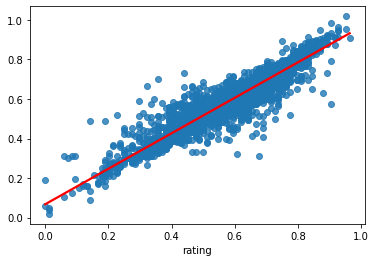

In [112]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()
model.fit(predictors, target, epochs= 300, verbose=2)
predictions = model.predict(X_test)
a2 = mean_squared_error(Y_test, predictions)
print(a2)
print(r2_score(Y_test,predictions))

#create scatterplot with regression line
sns.regplot(Y_test, predictions, ci=None,  line_kws={"color": "red"})

In [113]:
from keras.layers import Dense,Dropout
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()
model.fit(predictors, target, epochs= 300, verbose=2)
predictions = model.predict(X_test)
a3 = mean_squared_error(Y_test, predictions)
print(a3)
print(r2_score(Y_test,predictions))

Epoch 1/300
565/565 - 2s - loss: 0.0183 - 2s/epoch - 4ms/step
Epoch 2/300
565/565 - 2s - loss: 0.0144 - 2s/epoch - 3ms/step
Epoch 3/300
565/565 - 1s - loss: 0.0139 - 1s/epoch - 3ms/step
Epoch 4/300
565/565 - 1s - loss: 0.0134 - 1s/epoch - 3ms/step
Epoch 5/300
565/565 - 1s - loss: 0.0132 - 1s/epoch - 3ms/step
Epoch 6/300
565/565 - 1s - loss: 0.0131 - 1s/epoch - 3ms/step
Epoch 7/300
565/565 - 1s - loss: 0.0130 - 1s/epoch - 3ms/step
Epoch 8/300
565/565 - 1s - loss: 0.0128 - 1s/epoch - 3ms/step
Epoch 9/300
565/565 - 1s - loss: 0.0127 - 1s/epoch - 3ms/step
Epoch 10/300
565/565 - 1s - loss: 0.0125 - 1s/epoch - 3ms/step
Epoch 11/300
565/565 - 1s - loss: 0.0125 - 1s/epoch - 3ms/step
Epoch 12/300
565/565 - 1s - loss: 0.0122 - 1s/epoch - 3ms/step
Epoch 13/300
565/565 - 1s - loss: 0.0122 - 1s/epoch - 3ms/step
Epoch 14/300
565/565 - 1s - loss: 0.0120 - 1s/epoch - 3ms/step
Epoch 15/300
565/565 - 1s - loss: 0.0119 - 1s/epoch - 3ms/step
Epoch 16/300
565/565 - 1s - loss: 0.0118 - 1s/epoch - 3ms/step
E

In [110]:
from keras.layers import Dense,Dropout
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()
model.fit(predictors, target, epochs= 300, verbose=2)
predictions = model.predict(X_test)
a4 = mean_squared_error(Y_test, predictions)
print(a4)
print(r2_score(Y_test,predictions))

Epoch 1/300
565/565 - 2s - loss: 0.0187 - 2s/epoch - 4ms/step
Epoch 2/300
565/565 - 2s - loss: 0.0145 - 2s/epoch - 3ms/step
Epoch 3/300
565/565 - 2s - loss: 0.0139 - 2s/epoch - 3ms/step
Epoch 4/300
565/565 - 2s - loss: 0.0135 - 2s/epoch - 3ms/step
Epoch 5/300
565/565 - 2s - loss: 0.0133 - 2s/epoch - 3ms/step
Epoch 6/300
565/565 - 1s - loss: 0.0132 - 1s/epoch - 3ms/step
Epoch 7/300
565/565 - 2s - loss: 0.0130 - 2s/epoch - 3ms/step
Epoch 8/300
565/565 - 3s - loss: 0.0128 - 3s/epoch - 5ms/step
Epoch 9/300
565/565 - 2s - loss: 0.0127 - 2s/epoch - 3ms/step
Epoch 10/300
565/565 - 2s - loss: 0.0126 - 2s/epoch - 4ms/step
Epoch 11/300
565/565 - 2s - loss: 0.0125 - 2s/epoch - 3ms/step
Epoch 12/300
565/565 - 3s - loss: 0.0124 - 3s/epoch - 5ms/step
Epoch 13/300
565/565 - 3s - loss: 0.0123 - 3s/epoch - 5ms/step
Epoch 14/300
565/565 - 2s - loss: 0.0122 - 2s/epoch - 4ms/step
Epoch 15/300
565/565 - 2s - loss: 0.0121 - 2s/epoch - 4ms/step
Epoch 16/300
565/565 - 2s - loss: 0.0120 - 2s/epoch - 4ms/step
E